1. Import Required Libraries

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons, make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

sns.set(style="whitegrid")


2. Generate Moons and Circles Data

In [6]:
# Generate Moons Data
X_moons, y_moons = make_moons(n_samples=500, noise=0.1, random_state=42)

# Generate Circles Data
X_circles, y_circles = make_circles(n_samples=500, factor=0.5, noise=0.05, random_state=42)

# Scale the data (important for DBSCAN)
scaler = StandardScaler()
X_moons_scaled = scaler.fit_transform(X_moons)
X_circles_scaled = scaler.fit_transform(X_circles)


3. Apply DBSCAN

In [7]:
# DBSCAN for Moons
dbscan_moons = DBSCAN(eps=0.2, min_samples=5)
labels_moons = dbscan_moons.fit_predict(X_moons_scaled)

# DBSCAN for Circles
dbscan_circles = DBSCAN(eps=0.3, min_samples=5)
labels_circles = dbscan_circles.fit_predict(X_circles_scaled)


4. Visualize Clusters

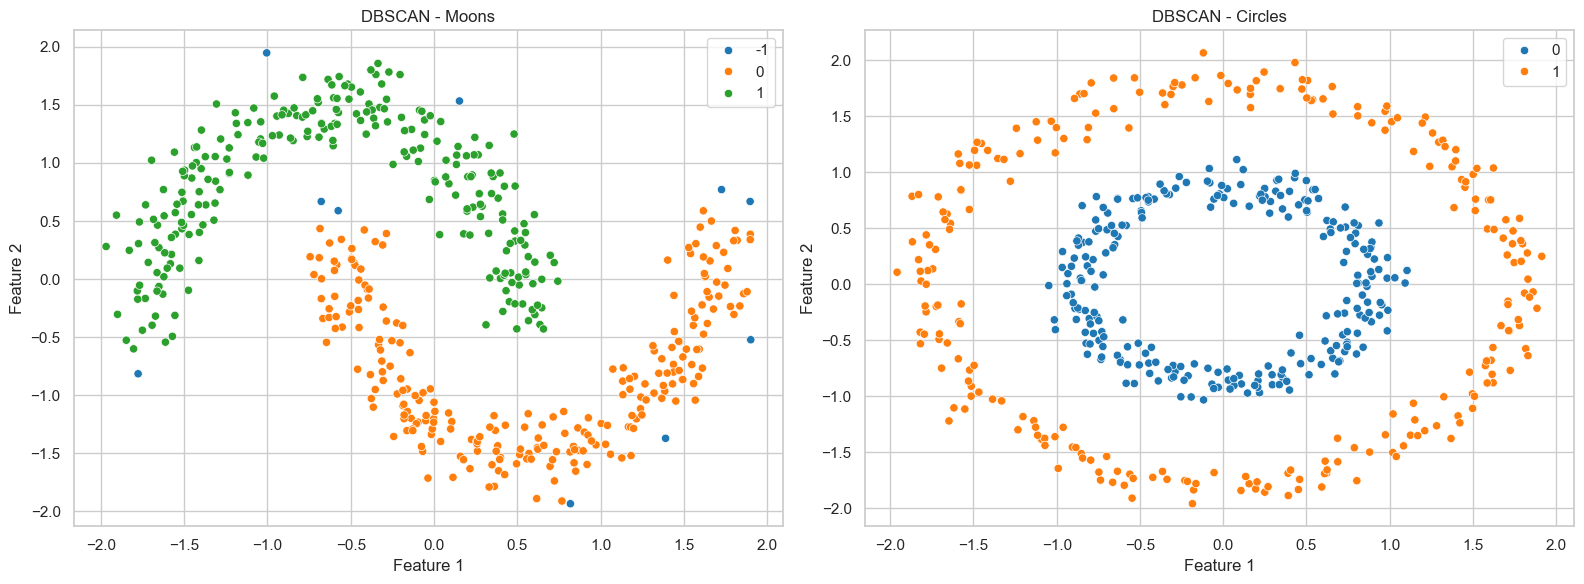

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot Moons
sns.scatterplot(x=X_moons_scaled[:, 0], y=X_moons_scaled[:, 1], hue=labels_moons, palette="tab10", ax=ax1)
ax1.set_title("DBSCAN - Moons")
ax1.set_xlabel("Feature 1")
ax1.set_ylabel("Feature 2")

# Plot Circles
sns.scatterplot(x=X_circles_scaled[:, 0], y=X_circles_scaled[:, 1], hue=labels_circles, palette="tab10", ax=ax2)
ax2.set_title("DBSCAN - Circles")
ax2.set_xlabel("Feature 1")
ax2.set_ylabel("Feature 2")

plt.tight_layout()
plt.show()


4.1 Moons Dataset
Cluster Distribution:
Cluster 0 (Orange): Lower arc
Cluster 1 (Green): Upper arc
Noise (Blue): Isolated points not fitting into any main cluster

Interpretation:
DBSCAN successfully separated the two moon shapes into distinct clusters.
Several points were classified as noise (Cluster -1), which likely represent the scattered outliers.
The clustering structure clearly captures the non-linear nature of the moons.
Silhouette Score: 0.306 (moderate clustering quality)

4.2 Circles Dataset
Cluster Distribution:
Cluster 0 (Blue): Inner circle
Cluster 1 (Orange): Outer circle

Interpretation:
DBSCAN accurately identified the two concentric circles as separate clusters.
The model effectively ignored the density difference between the inner and outer rings.
No significant noise points were identified, indicating that the data is well-structured for DBSCAN.
Silhouette Score: 0.113 (lower, suggesting some overlap or boundary confusion)

5. Evaluate Clustering Quality

In [9]:
# Silhouette Scores
sil_moons = silhouette_score(X_moons_scaled, labels_moons)
sil_circles = silhouette_score(X_circles_scaled, labels_circles)

print(f"Silhouette Score (Moons): {sil_moons:.3f}")
print(f"Silhouette Score (Circles): {sil_circles:.3f}")


Silhouette Score (Moons): 0.306
Silhouette Score (Circles): 0.113


Successfully handled the non-linear cluster shapes without needing predefined cluster numbers.
Effectively identified noise in the moons dataset.
Unlike K-Means, which struggles with these shapes, DBSCAN clearly captures the curved structures.